## Geometric and intensity transformations

#### citation:
- https://www.mathworks.com/discovery/affinetransformation.html#:~:text=Affine%20transformation%20is%20a%20linear,with%20non%2Dideal%20camera%20angles.

- https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html

C:\Users\HP\AppData\Local\Temp\ipykernel_22916\598176027.py:11: DeprecationWarning: scipy.misc.ascent has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.ascent instead.
  f = misc.ascent()  # retrieve a grayscale image


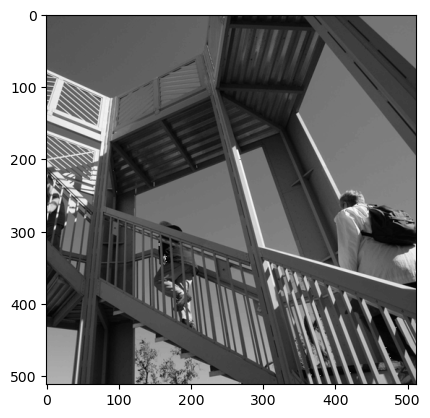

In [ ]:
import scipy as sc
from scipy import misc
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
#install skimage: pip install scikit-image
import skimage
from skimage import transform

from scipy import ndimage
f = misc.ascent()  # retrieve a grayscale image
imshow(f, cmap=plt.cm.gray)

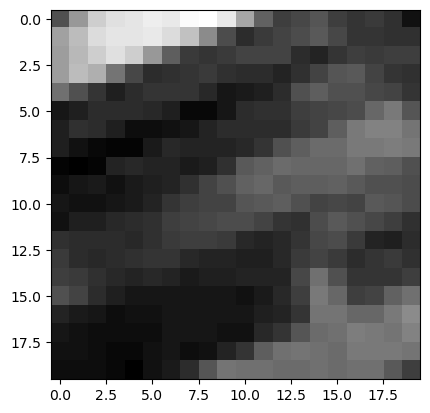

In [ ]:
# Explore intensity variations
imshow(f[220:240, 110:130], cmap=plt.cm.gray, interpolation='nearest')

In [ ]:
## Geometric transformations
lx, ly = f.shape
# Cropping
crop_f = f[lx // 4: - lx // 4, ly // 4: - ly // 4]
# up <-> down flip
flip_ud_f = np.flipud(f)
# rotation
rotate_f = ndimage.rotate(f, 45)
rotate_f_noreshape = ndimage.rotate(f, 45, reshape=False)

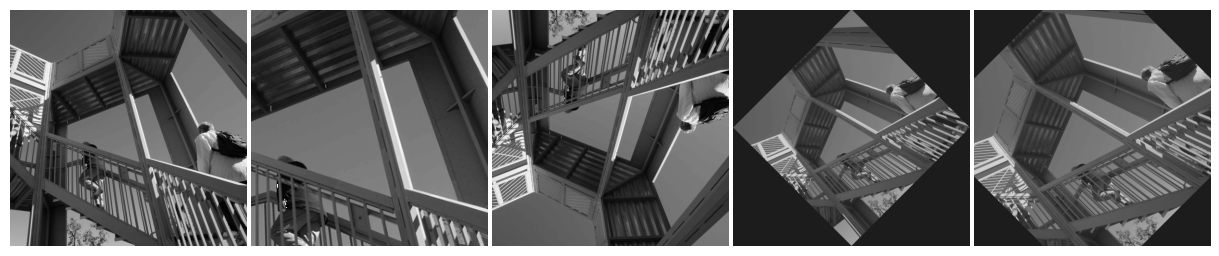

In [ ]:

plt.figure(figsize=(12, 3))
plt.subplot(151)
imshow(f, cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(152)
imshow(crop_f, cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(153)
imshow(flip_ud_f, cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(154)
imshow(rotate_f, cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(155)
imshow(rotate_f_noreshape, cmap=plt.cm.gray)
plt.axis('off')
plt.subplots_adjust(wspace=0.02, hspace=0.3, top=1, bottom=0.1, left=0,
                    right=1)

plt.show()

### Translation

Text(0.5, 1.0, 'Translated image')

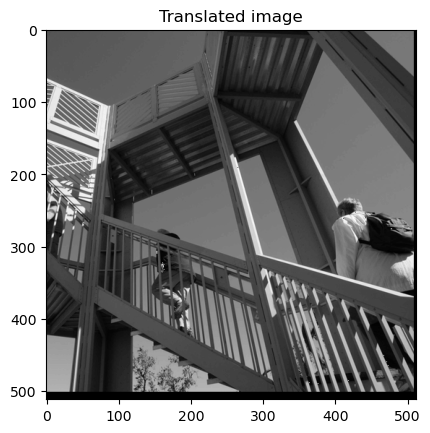

In [ ]:
# Recall the shape of the transformation matrix
#[[a0  a1  a2]
# [b0  b1  b2]
# [0   0    1]]
# Lets translate by dx=3 and dy=10 pixels
transl=np.array([[1,0,3],[0,1,10],[0,0,1]])
transl=transl.reshape((3,3))
imshow(transl, cmap='gray')

tf=transform.AffineTransform(matrix=transl, scale=None, rotation=None, shear=None, translation=None)
transl=transform.warp(f, tf, order =1, preserve_range=True, mode='constant')
imshow(transl, cmap='gray')
plt.title("Translated image")

### Shear

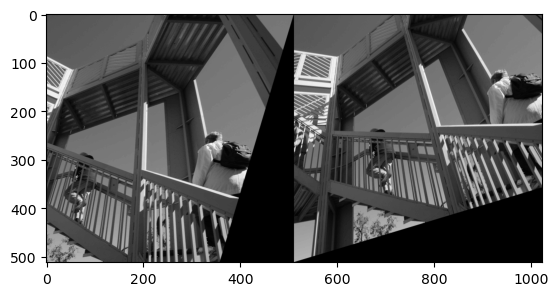

In [ ]:
# horizontal
f=f/255.0
shear1=np.array([[1, 0.3 , 0.0],[0, 1, 0],[0,0,1]])
tf_h=transform.AffineTransform(matrix=shear1, scale=None, rotation=None, shear=None, translation=None)
im1=transform.warp(f, tf_h, order =1, preserve_range=True, mode='constant')
# vertical
shear2=np.array([[1, 0.0 , 0.0],[0.3, 1, 0],[0,0,1]])
tf_v=transform.AffineTransform(matrix=shear2, scale=None, rotation=None, shear=None, translation=None)
im2=transform.warp(f, tf_v, order =1, preserve_range=True, mode='constant')

plt.figure()
imshow(np.hstack([im1,im2]), cmap='gray')

In [ ]:
tf_v

<AffineTransform(matrix=
    [[1. , 0. , 0. ],
     [0.3, 1. , 0. ],
     [0. , 0. , 1. ]]) at 0x214e806ee50>

### Rescaling

In [ ]:
f_rescaled=transform.rescale(f, 0.5, anti_aliasing=False)

Text(0.5, 1.0, 'Rescaled image by 50%')

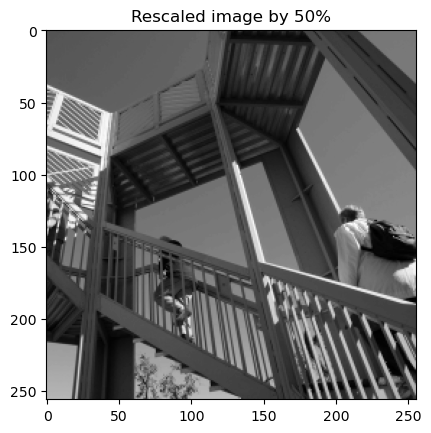

In [ ]:
imshow(f_rescaled, cmap='gray')
plt.title("Rescaled image by 50%")

### Resizing

In [ ]:
f_resized=transform.resize(f, (int(f.shape[0]/3), f.shape[1]/4), anti_aliasing=True)
imshow(f_resized, cmap='gray')

In [ ]:
np.shape(f_resized)

### Rotation with transform.rotate

In [ ]:
import math

tf=transform.rotate(f, 45, resize=True, mode='constant')
im=tf*255
imshow(im, cmap='gray')


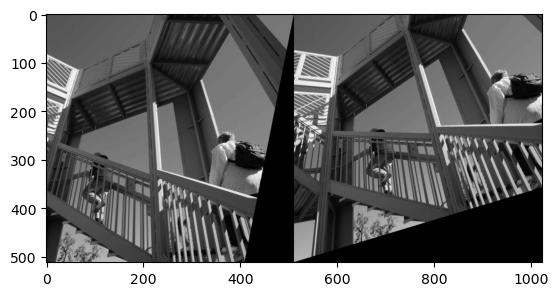

In [ ]:

f=f/255.0
shear1=np.array([[1, 0.2 , 0.0],[0, 1, 0],[0,0,1]])
tf_h=transform.AffineTransform(matrix=shear1, scale=None, rotation=None, shear=None, translation=None)
im1=transform.warp(f, tf_h, order =1, preserve_range=True, mode='constant')

shear2=np.array([[1, 0.0 , 0.0],[0.3, 1, 0],[0,0,1]])
tf_v=transform.AffineTransform(matrix=shear2, scale=None, rotation=None, shear=None, translation=None)
im2=transform.warp(f, tf_v, order =1, preserve_range=True, mode='constant')

plt.figure()
imshow(np.hstack([im1,im2]), cmap='gray')

Text(0.5, 1.0, 'Rescaled image by 50%')

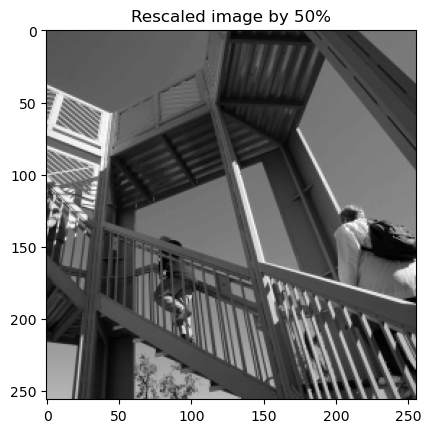

In [ ]:
f_rescaled=transform.rescale(f, 0.5, anti_aliasing=False)

imshow(f_rescaled, cmap='gray')
plt.title("Rescaled image by 50%")

Text(0.5, 1.0, 'Translated image')

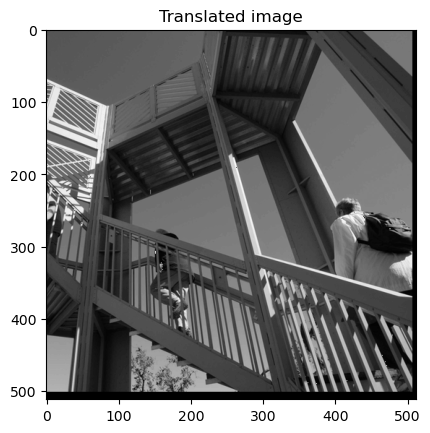

In [ ]:

transl=np.array([[1,0,5],[0,1,10],[0,0,1]])
transl=transl.reshape((3,3))
imshow(transl, cmap='gray')

tf=transform.AffineTransform(matrix=transl, scale=None, rotation=None, shear=None, translation=None)
transl=transform.warp(f, tf, order =1, preserve_range=True, mode='constant')
imshow(transl, cmap='gray')
plt.title("Translated image")

C:\Users\HP\AppData\Local\Temp\ipykernel_22916\195484757.py:4: DeprecationWarning: scipy.misc.ascent has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.ascent instead.
  f = misc.ascent()


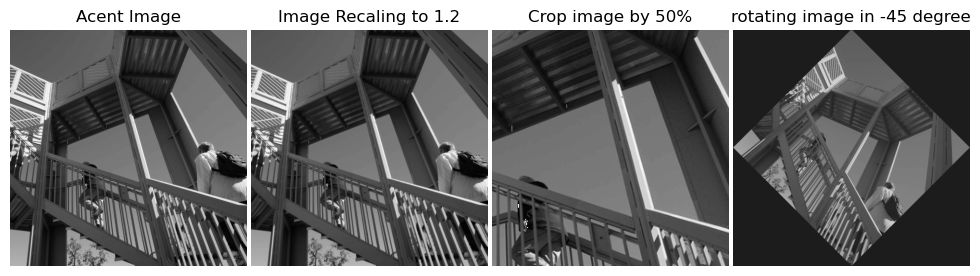

In [ ]:


f = misc.ascent()

## Geometric transformations
lx, ly = f.shape

# Cropping
crop_n = f[lx // 4: - lx // 4, ly // 4: - ly // 4]

# rescaling
f_rescaled=transform.rescale(f, 1.2, anti_aliasing=False)

# rotation
rotate_f = ndimage.rotate(f, -45)


plt.figure(figsize=(12, 8))
plt.subplot(151)
imshow(f, cmap=plt.cm.gray)
plt.axis('off')
plt.title('Acent Image')

plt.subplot(152)
imshow(f_rescaled, cmap=plt.cm.gray)
plt.axis('off')
plt.title('Image Recaling to 1.2')

plt.subplot(153)
imshow(crop_n, cmap=plt.cm.gray)
plt.axis('off')
plt.title('Crop image by 50%')

plt.subplot(154)
imshow(rotate_f, cmap=plt.cm.gray)
plt.axis('off')
plt.title('rotating image in -45 degree')

plt.subplots_adjust(wspace=0.02, hspace=0.3, top=1, bottom=0.1, left=0,
                    right=1)

plt.show()



### Gamma correction and log contrast adjustment

Text(0.5, 0, 'Pixel intensity')

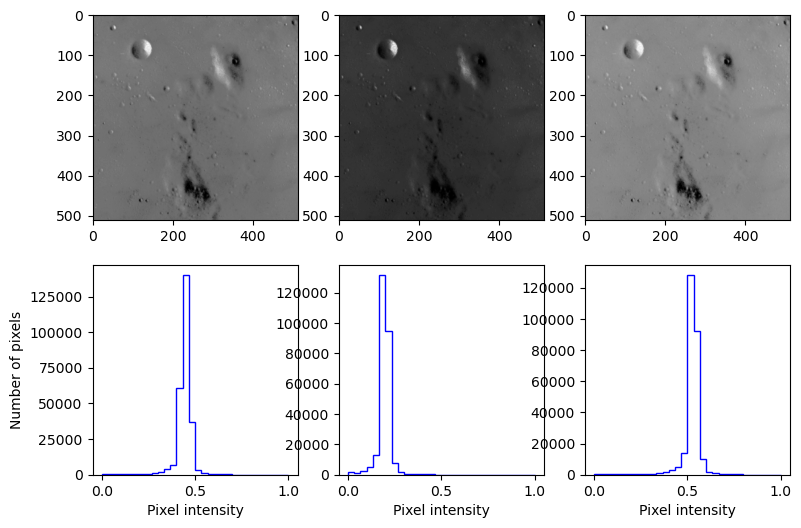

In [ ]:
from skimage import data, img_as_float
from skimage import exposure

# Load a low-contrast image
im = data.moon()
im= img_as_float(im)

fig=plt.figure(figsize=(9,6))

axes = np.zeros((2,3), dtype=object )
axes[0,0]=plt.subplot(2,3,1)
axes[0,1]=plt.subplot(2,3,2)
axes[0,2]=plt.subplot(2,3,3)

axes[1,0]=plt.subplot(2,3,4)
axes[1,1]=plt.subplot(2,3,5)
axes[1,2]=plt.subplot(2,3,6)
ax_im, ax_hist = axes


gamma_corrected = exposure.adjust_gamma(im, 2)


logarithmic_corrected = exposure.adjust_log(im, 1)


ax_im[0].imshow(im, cmap='gray')

ax_hist[0].hist(im.ravel(), bins=30, histtype='step', color='b' )
ax_hist[0].set_xlabel('Pixel intensity')
ax_hist[0].set_ylabel('Number of pixels')

ax_im[1].imshow(gamma_corrected, cmap='gray')

ax_hist[1].hist(gamma_corrected.ravel(), bins=30, histtype='step', color='b' )
ax_hist[1].set_xlabel('Pixel intensity')

ax_im[2].imshow(logarithmic_corrected, cmap='gray')

ax_hist[2].hist(logarithmic_corrected.ravel(), bins=30, histtype='step', color='b' )
ax_hist[2].set_xlabel('Pixel intensity')




The gamma correction modifies the pixel value of the image.

g(x,y) = cf(x,y)𝛾

If the Gamma > 1, the transformation will increase the pixel intensity, making the image darker.

If the histogram of pixels shifts towards a lower range, the image appears darker.

If the Gamma < 1, then the transformation will amplify the intensity of the pixel, and the darker area will become brighter, making the image brighter.

If the histogram of pixels shifts towards a higher range, the image appears brighter.


 By using logarithmic transformation on image :
  g(x, y) = c log(1 + f(x, y))
  
-This logarithmic transformation compresses the dynamic range of the image

-It enhance the visibility of details of dark area in the image by compressing the brighter intensity of the value.

-This can help bring out hidden details from images.

Text(0.5, 0, 'Pixel intensity')

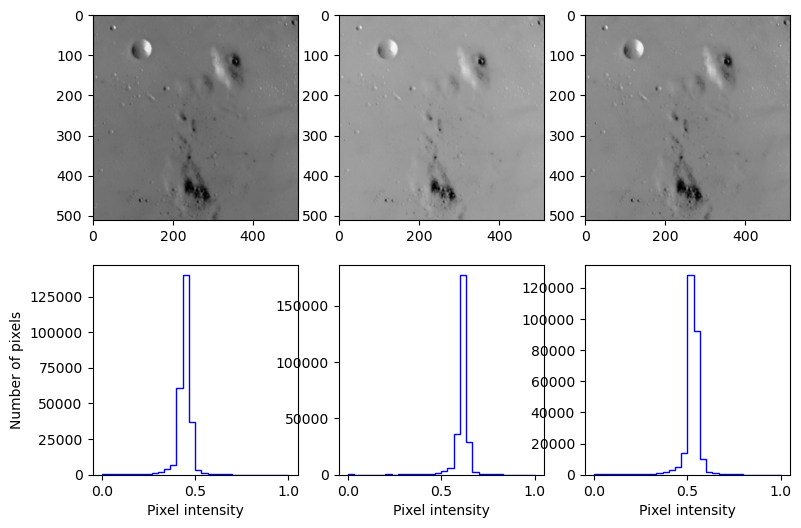

In [ ]:
im = data.moon()
im= img_as_float(im)

fig=plt.figure(figsize=(9,6))

axes = np.zeros((2,3), dtype=object )
axes[0,0]=plt.subplot(2,3,1)
axes[0,1]=plt.subplot(2,3,2)
axes[0,2]=plt.subplot(2,3,3)

axes[1,0]=plt.subplot(2,3,4)
axes[1,1]=plt.subplot(2,3,5)
axes[1,2]=plt.subplot(2,3,6)
ax_im, ax_hist = axes

gamma_corrected = exposure.adjust_gamma(im, 0.6)

logarithmic_corrected = exposure.adjust_log(im, 1)

ax_im[0].imshow(im, cmap='gray')

ax_hist[0].hist(im.ravel(), bins=30, histtype='step', color='b' )
ax_hist[0].set_xlabel('Pixel intensity')
ax_hist[0].set_ylabel('Number of pixels')

ax_im[1].imshow(gamma_corrected, cmap='gray')

ax_hist[1].hist(gamma_corrected.ravel(), bins=30, histtype='step', color='b' )
ax_hist[1].set_xlabel('Pixel intensity')

ax_im[2].imshow(logarithmic_corrected, cmap='gray')

ax_hist[2].hist(logarithmic_corrected.ravel(), bins=30, histtype='step', color='b' )
ax_hist[2].set_xlabel('Pixel intensity')

The effect of gamma < 1:
- Whhen I set it to 0.6 it appears from histogram that makes the image brighter, compressing dark area details.
- comparing results with gamma = 2, its seems that image gets darker, while the image details are more compressed,
- However, changing gamma's value to less than 1 enhance the contrast of the image.